In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych: XOR<H1>

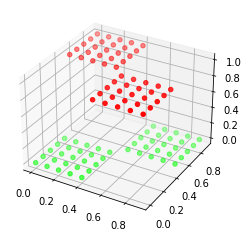

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

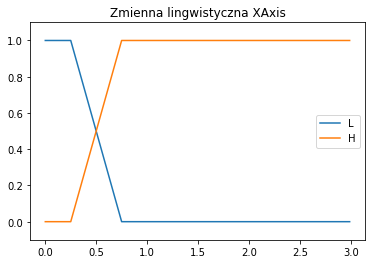

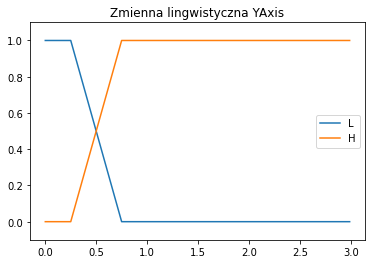

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.08087973 0.40664821 0.87293184]
 [0.82308222 0.47340467 0.60889425]
 [0.67698321 0.15813937 0.92237133]
 [0.33871395 0.36555607 0.53126804]]


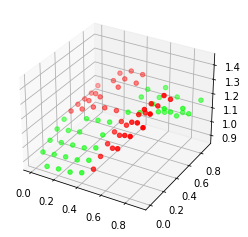

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   2.6423236468672335e-06
Liczba ew:  33972
Liczba it:  50
TIME elapsed:  6.804330587387085


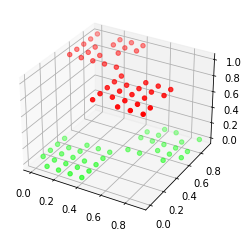

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

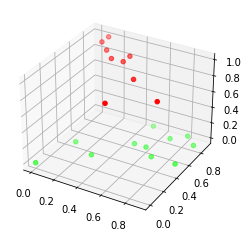

[[11  0]
 [ 0  9]]


In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

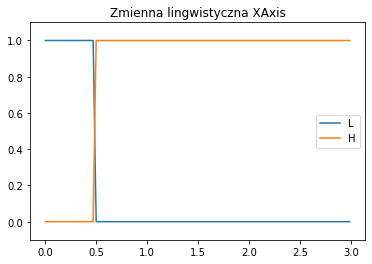

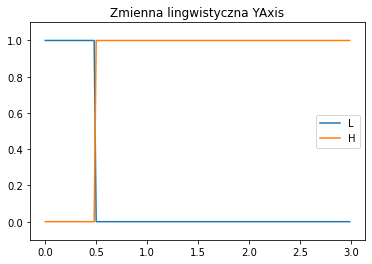

In [7]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [8]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.48476539, 0.02754735],
       [0.4895001 , 0.01822136]]) 
Konkluzje:  array([[5.28943836e-13, 1.17780058e-12, 2.44778660e-12],
       [0.00000000e+00, 3.44080104e-07, 9.99999906e-01],
       [1.99586669e-08, 3.87716181e-07, 9.99999814e-01],
       [2.08710321e-12, 1.30660754e-12, 1.87484741e-12]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

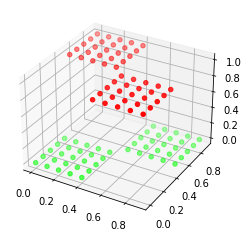

In [9]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

## Data preparation

In [10]:
class Dataset:
    def __init__(self, X, Y, name) -> None:
        self.name = name
        self.__data = X
        self.__targets = Y
        self.__x_train, self.__x_test, self.__y_train, self.__y_test = (None, None, None, None)
        
    def split(self, test_size =0.2, random_state =2137):
        self.__x_train, self.__x_test, self.__y_train, self.__y_test = train_test_split(
                                                                            self.__data, 
                                                                            self.__targets, 
                                                                            test_size=test_size, 
                                                                            random_state=random_state)
    
    @property
    def trainX(self): return self.__x_train.T
    
    @property
    def trainY(self): return self.__y_train
    
    @property
    def testX(self): return self.__x_test.T
    
    @property
    def testY(self): return self.__y_test

In [11]:
from typing import Tuple

def generate_data_for_multiply(start, end, test_size=0.2, random_state=2137):

    x: np.ndarray = np.arange(start, end+0.1, 0.1)
    tup: Tuple[np.ndarray, np.ndarray] = np.meshgrid(x, x)
    x, y = tup
    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.round(dataX * dataY).astype(int)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataX, dataY, data_labels, c=data_labels, cmap='cividis')
    plt.show()
    data = Dataset(dataXY, data_labels, name=f"{end}x{end}")
    data.split(test_size, random_state)
    return data

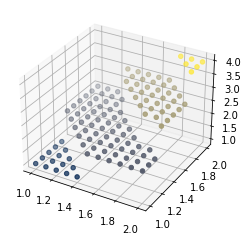

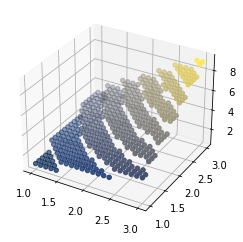

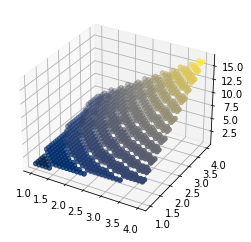

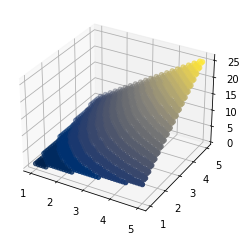

In [12]:
datasets = [generate_data_for_multiply(1, num) for num in range(2, 6)]

In [13]:
def create_vars(end):
    
    mf = [[num+1, 0.5, 0.5, 0.5] for num in range(end)]
    varX = FuzzyInputVariable_List_Trapezoids(mf, f"XAxis[{1},{end}]", [f"{i + 1}" for i in range(end)])
    varY = FuzzyInputVariable_List_Trapezoids(mf, f"YAxis[{1},{end}]", [f"{i + 1}" for i in range(end)])
    return [varX, varY]

variables = [create_vars(num) for num in range(2, 6)]

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.920306   0.38465057 0.78559178]
 [0.68627964 0.53252297 0.88913607]
 [0.586181   0.99591205 0.21357921]
 [0.0858957  0.58198277 0.66575784]]


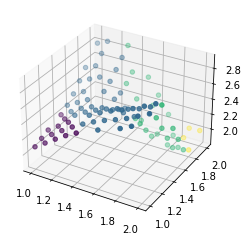

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.73611623 0.5428993  0.350892  ]
 [0.84181117 0.11540945 0.285126  ]
 [0.89267551 0.52032451 0.8065906 ]
 [0.8140564  0.9594187  0.59893871]
 [0.40701351 0.61171155 0.67060043]
 [0.50242631 0.16770332 0.11452155]
 [0.48575007 0.5345156  0.41918315]
 [0.47540627 0.00399336 0.48437561]
 [0.36715407 0.27538515 0.79519908]]


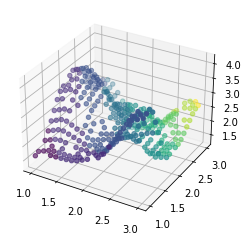

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[3.74105531e-01 5.83879078e-01 6.67422307e-01]
 [8.08698948e-01 7.96781595e-01 3.82623558e-01]
 [5.73727752e-01 5.22582280e-01 4.70231947e-01]
 [1.24550311e-01 4.19395385e-01 7.70692343e-02]
 [1.91693796e-01 8.24492935e-01 6.37613983e-04]
 [7.25188032e-01 3.02776569e-01 6.77903962e-01]
 [2.24118942e-01 6.30764396e-01 9.37292933e-01]
 [2.69294860e-01 6.76610438e-01 9.02023455e-01]
 [8.94513235e-01 3.32245989e-01 3.40513539e-01]
 [5.41425474e-02 4.79900322e-01 1.84786621e-01]
 [1.98756409e-01 7.83903407e-01 1.58976693e-01]
 [4.34467462e-01 6.57543576e-01 1.36437179e-01]
 [8.01438997e-01 6.10858251e-01 9.63318487e-01]
 [9.35890737e-01 5.92582349e-01 3.96340850e-01]
 [4.77294483e-01 3.47717618e-02 6.78496375e-01]
 [8.56130278e-01 5.88333490e-01 1.48526630e-01]]


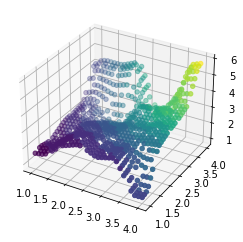

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5], [5, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5], [5, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.21810996 0.52599692 0.74500374]
 [0.06933113 0.79880026 0.2317882 ]
 [0.36070845 0.85298083 0.04038335]
 [0.10620202 0.82361015 0.7835617 ]
 [0.16898662 0.87915424 0.42277357]
 [0.95594913 0.3162385  0.67617337]
 [0.76648185 0.1205883  0.68127957]
 [0.50462899 0.90749012 0.5875168 ]
 [0.23267403 0.97509515 0.93580351]
 [0.67788132 0.94104176 0.69560207]
 [0.96607402 0.97414064 0.55768103]
 [0.50608771 0.80633814 0.26402678]
 [0.73144149 0.57005504 0.47741571]
 [0.49886655 0.48882559 0.43312998]
 [0.97008045 0.34498196 0.73863529]
 [0.01663842 0.29290985 0.28397628]
 [0.27299765 0.52619653 0.20073291]
 [0.46531558 0.77777324 0.77010463]
 [0.6110719  0.77416769 0.82554784]
 [0.41816692 0.23274423 0.38910119]
 [0.27612346 0.20755811 0.2

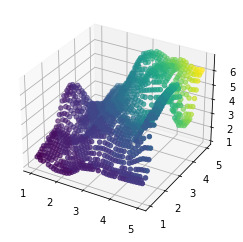

In [14]:
def create_anfis_instance(variables, dataset: Dataset):
    fis = ANFIS(variables, dataset.trainX, dataset.trainY)

    print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    fis.show_results(color=dataset.trainY)
    return fis
anfises = {dataset.name:create_anfis_instance(vs, dataset) for vs, dataset in zip(variables, datasets)}

In [15]:
import concurrent.futures as cf
import utils
from typing import Dict

times = {}
trained_anfises: Dict[str, ANFIS] = {}
if __name__ == "__main__":
    with cf.ProcessPoolExecutor(max_workers=5) as executor:
        _futures = [executor.submit(utils.measure_time, key, anfis, 200) for key, anfis in anfises.items()]
        for future in cf.as_completed(_futures):
            key, _time, model = future.result()
            times[key] = _time
            trained_anfises[key] = model
            

In [16]:
print(times)

{'2x2': 82.95248913764954, '3x3': 442.3745138645172, '4x4': 1071.116141319275, '5x5': 6079.941692829132}


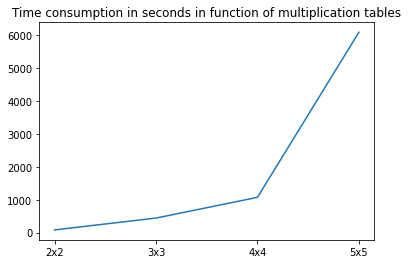

In [17]:
plt.plot(list(times.values()))
plt.title("Time consumption in seconds in function of multiplication tables")
plt.xticks(np.arange(len(times.values())), list(times.keys()))
plt.show()

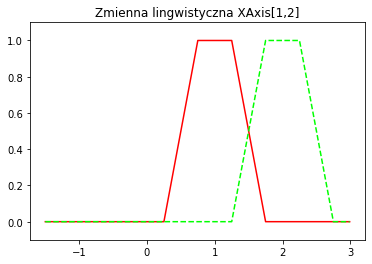

In [35]:
var_x, var_y = variables[0]
trained_var_x, trained_var_y = trained_anfises["2x2"].input_list

var_x.show(np.arange(-1.5, 3, 0.01))

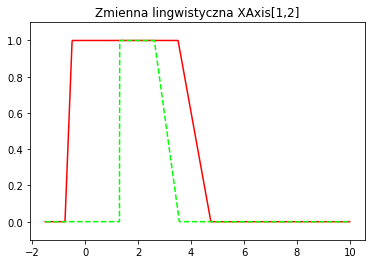

In [36]:
trained_var_x.show(np.arange(-1.5, 10, 0.01))

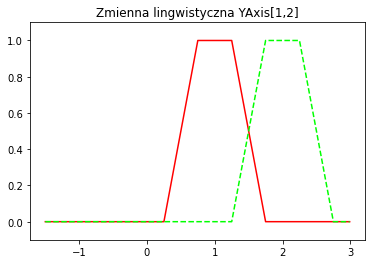

In [37]:
var_y.show(np.arange(-1.5, 3, 0.01))

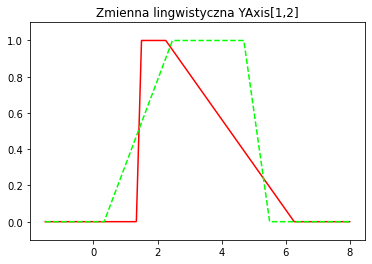

In [38]:
trained_var_y.show(np.arange(-1.5, 8, 0.01))


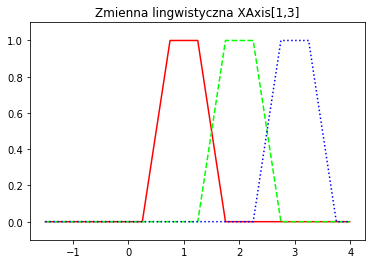

In [39]:
var_x, var_y = variables[1]
trained_var_x, trained_var_y = trained_anfises["3x3"].input_list

var_x.show(np.arange(-1.5, 4, 0.01))

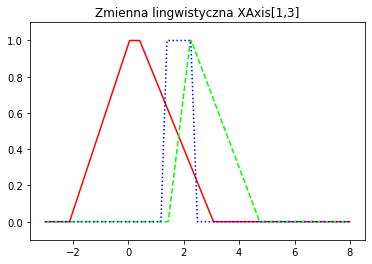

In [40]:
trained_var_x.show(np.arange(-3, 8, 0.01))


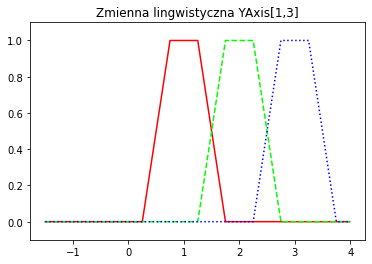

In [41]:
var_y.show(np.arange(-1.5, 4, 0.01))

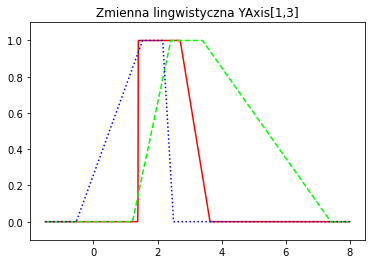

In [42]:
trained_var_y.show(np.arange(-1.5, 8, 0.01))

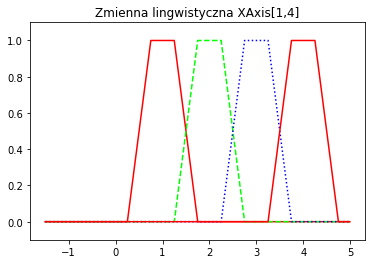

In [43]:
var_x, var_y = variables[2]
trained_var_x, trained_var_y = trained_anfises["4x4"].input_list

var_x.show(np.arange(-1.5, 5, 0.01))

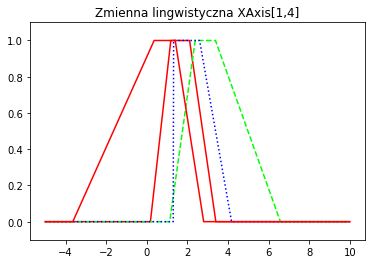

In [44]:
trained_var_x.show(np.arange(-5, 10, 0.01))

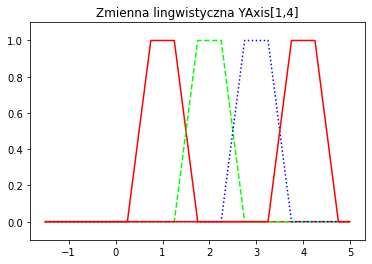

In [45]:
var_y.show(np.arange(-1.5, 5, 0.01))

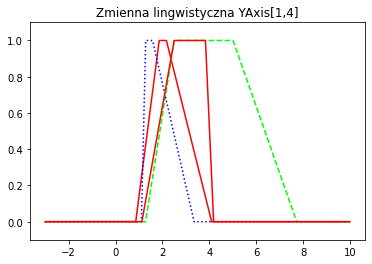

In [46]:
trained_var_y.show(np.arange(-3, 10, 0.01))


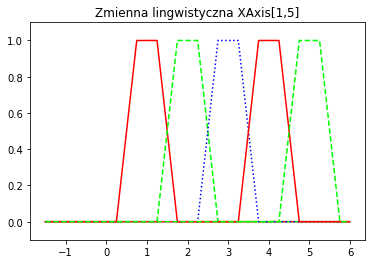

In [47]:
var_x, var_y = variables[3]
trained_var_x, trained_var_y = trained_anfises["5x5"].input_list

var_x.show(np.arange(-1.5, 6, 0.01))

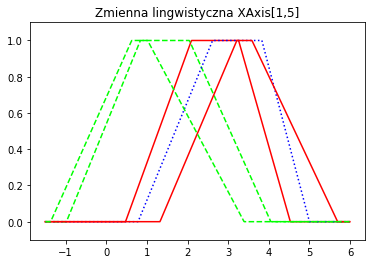

In [48]:
trained_var_x.show(np.arange(-1.5, 6, 0.01))


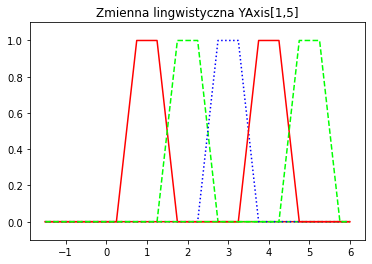

In [49]:
var_y.show(np.arange(-1.5, 6, 0.01))

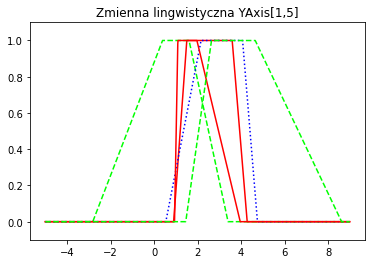

In [50]:
trained_var_y.show(np.arange(-5, 9, 0.01))


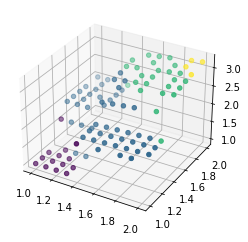

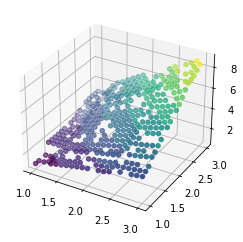

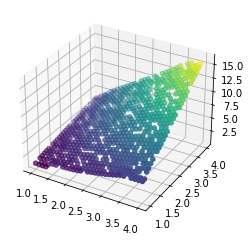

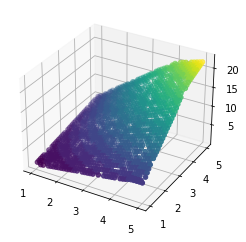

In [51]:
for dataset, anfis in zip(datasets, list(trained_anfises.values())):
    anfis.show_results(dataset.trainY)

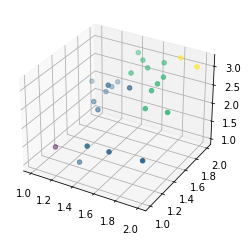

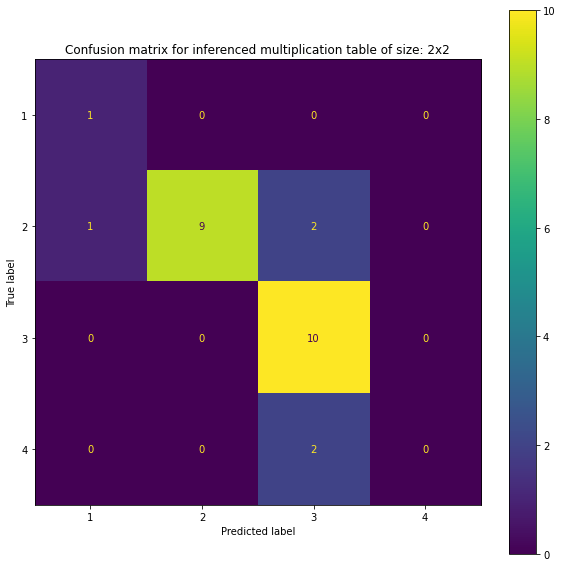

ACCURACY: 0.8


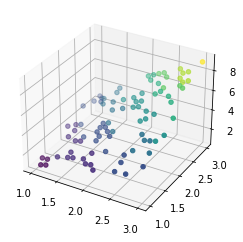

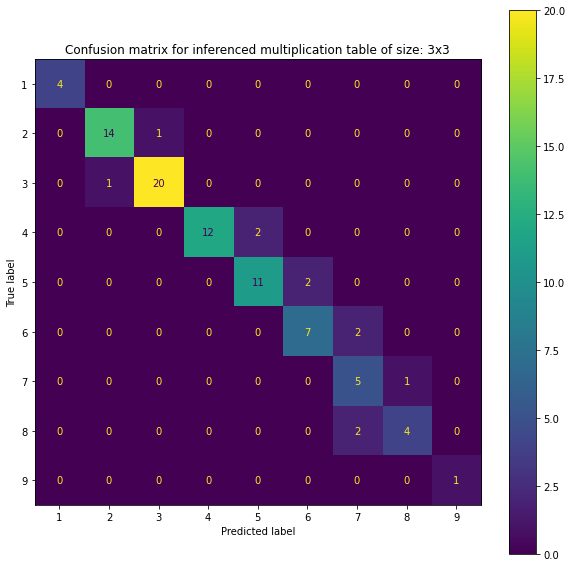

ACCURACY: 0.8764044943820225


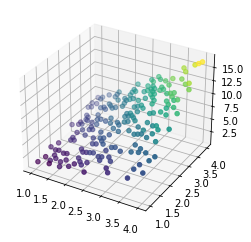

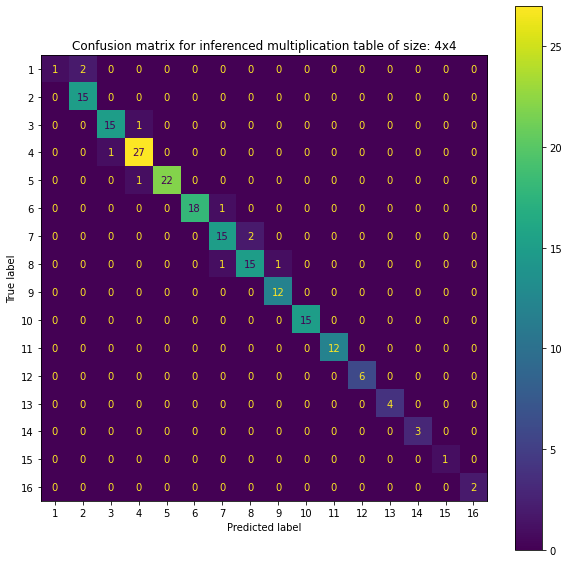

ACCURACY: 0.9481865284974094


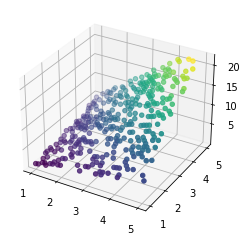

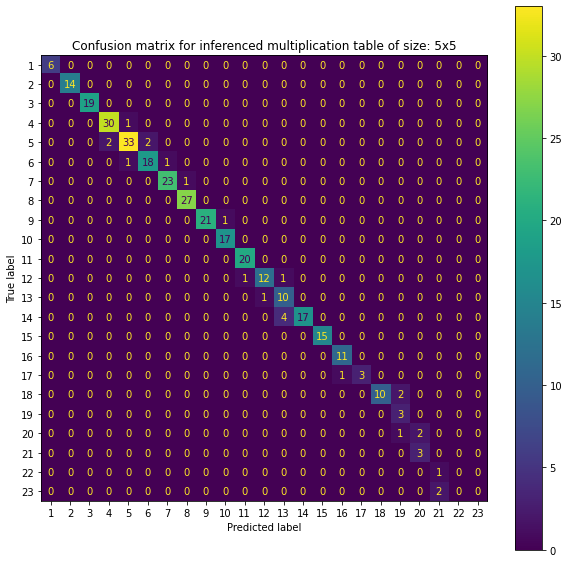

ACCURACY: 0.9228486646884273


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
for fis, key, dataset in zip(list(trained_anfises.values()), list(trained_anfises.keys()), datasets):
    fis.training_data = dataset.testX
    fis.expected_labels = dataset.testY
    fis.show_results(dataset.testY)  

    y_pred = fis.anfis_estimate_labels(fis.premises, fis.op, fis.tsk)
    y_pred = list(map(round, y_pred.flatten()))
    conf = confusion_matrix(dataset.testY, y_pred)
    disp = ConfusionMatrixDisplay(conf, display_labels=set(dataset.testY))
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax)
    plt.title(f"Confusion matrix for inferenced multiplication table of size: {key}")
    plt.show()
    print(f"ACCURACY: {accuracy_score(dataset.testY, y_pred)}")